In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scripts.receptive_fields import one_receptive_field,show_receptive_field
input_patterns=np.load('input_patterns.npy')
weights=np.load('weights.npy')

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def one_step(weights, pre_syn, post_syn,tau):
    dt=0.001
    new_post_syn=post_syn+(dt/tau)*(-post_syn+np.dot(weights,sigmoid(pre_syn)))
    return new_post_syn

In [3]:
def sim():
    for tau in [0.01,0.1,1,10]:
        data_path='/media/maria/DATA1/Documents/data_for_suite2p/TX39_total/'
        xs=[0]
        for j in range(0,input_patterns.shape[-1]):
            xs.append(one_step(weights,input_patterns[:,j],xs[-1],tau))
        xs=np.array(xs)
        plt.plot(xs)
        plt.title('Timeseries with tau '+str(tau))
        plt.show()
        B0=one_receptive_field(data_path,xs)
        show_receptive_field(B0,tau)
        

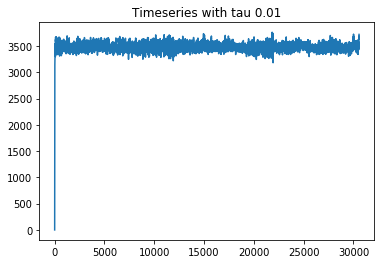

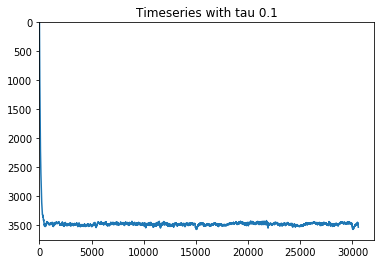

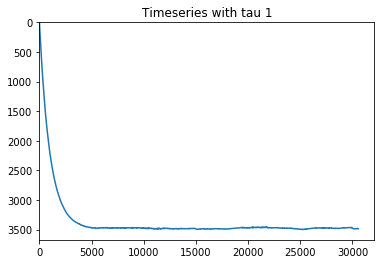

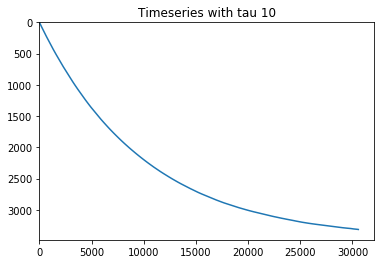

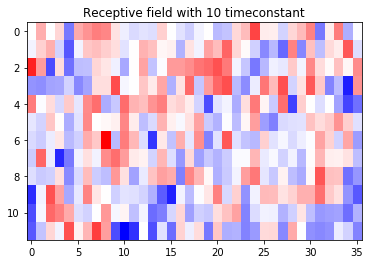

In [4]:
sim()